### Importación de datos



In [38]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#1. Análisis de facturación



Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


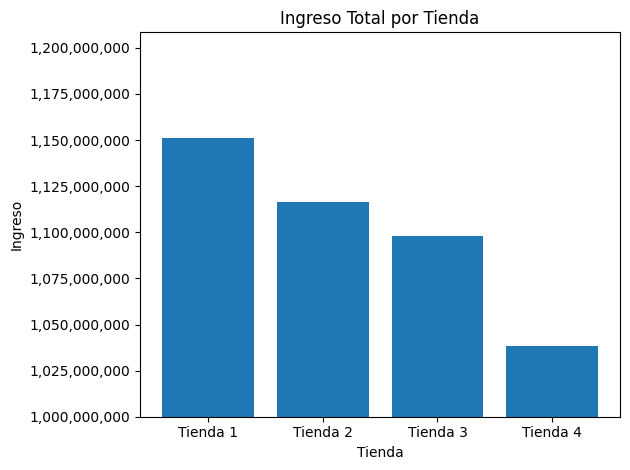

In [104]:
for df, nombre in zip(tiendas, nombres):
    ingreso = int(df['Precio'].sum())
    print(f"{nombre}: ${ingreso:,}")

ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]
fig, ax = plt.subplots()
ax.bar(nombres, ingresos)
ax.set_title('Ingreso Total por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Ingreso')
ax.set_ylim(1_000_000_000, max(ingresos) * 1.05)
import matplotlib.ticker as mticker
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Tienda 1: Muebles = 465 ventas


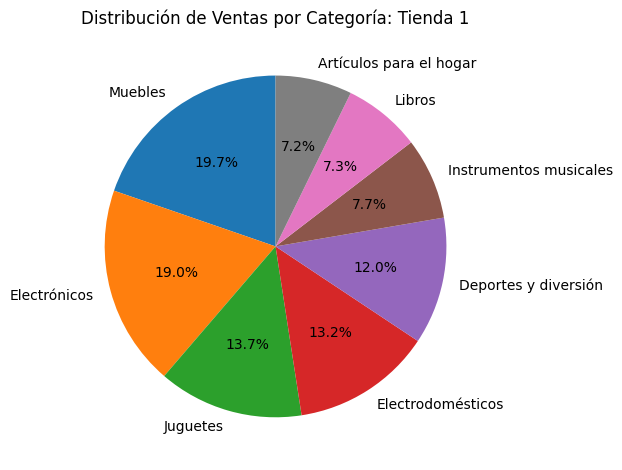

Tienda 2: Muebles = 442 ventas


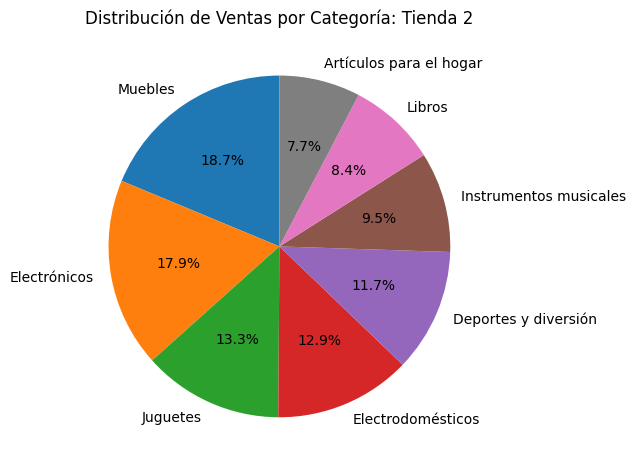

Tienda 3: Muebles = 499 ventas


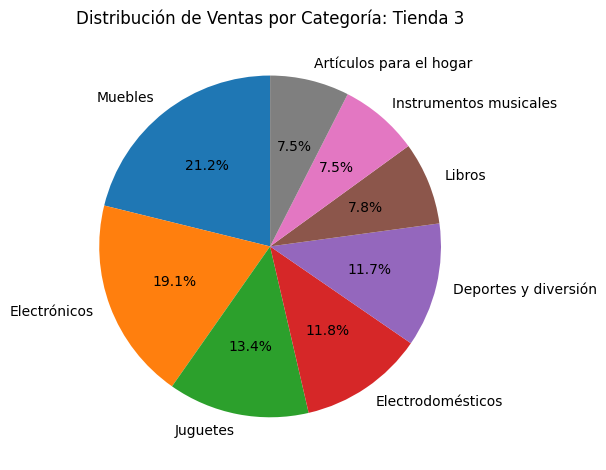

Tienda 4: Muebles = 480 ventas


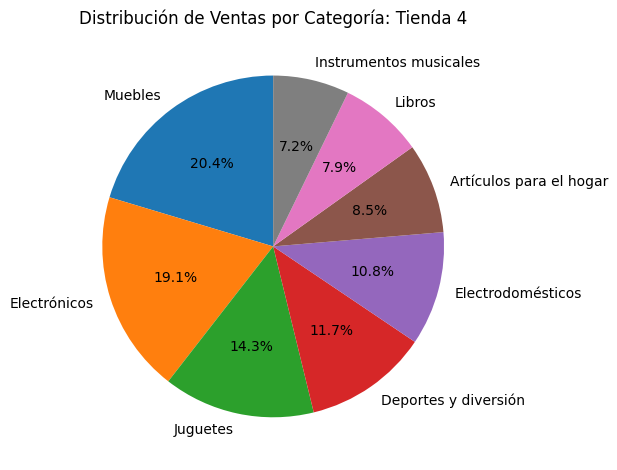

In [121]:
for df, nombre in zip(tiendas, nombres):
    counts = df['Categoría del Producto'].value_counts()
    top_categoria = counts.idxmax()
    top_ventas    = counts.max()
    print(f"{nombre}: {top_categoria} = {top_ventas} ventas")
    counts = df['Categoría del Producto'].value_counts()
    plt.figure()
    plt.pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Distribución de Ventas por Categoría: {nombre}')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [85]:
for df, nombre in zip(tiendas, nombres):
    count = df['Calificación'].count()
    promedio = df['Calificación'].mean()
    print(f"{nombre}: Calificación promedio: {promedio:.2f} ({count} valoraciones)")

Tienda 1: Calificación promedio: 3.98 (2359 valoraciones)
Tienda 2: Calificación promedio: 4.04 (2359 valoraciones)
Tienda 3: Calificación promedio: 4.05 (2359 valoraciones)
Tienda 4: Calificación promedio: 4.00 (2358 valoraciones)


# 4. Productos más y menos vendidos

In [84]:
for df, nombre in zip(tiendas, nombres):
    ventas = df['Producto'].value_counts()
    print(f"{nombre}:")
    print(f"Producto más vendido: {ventas.idxmax()} ({ventas.max()} ventas)")
    print(f"Producto menos vendido: {ventas.idxmin()} ({ventas.min()} ventas)\n")

Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

Tienda 1: Envío promedio: $26018.61
Tienda 2: Envío promedio: $25216.24
Tienda 3: Envío promedio: $24805.68
Tienda 4: Envío promedio: $23459.46


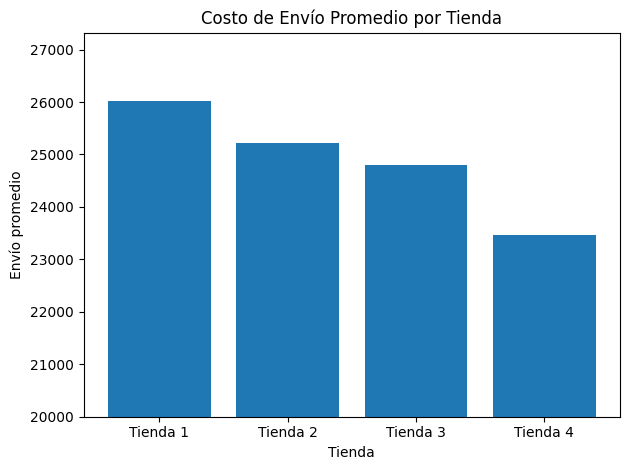

In [120]:
for df, nombre in zip(tiendas, nombres):
    envio_promedio = df['Costo de envío'].mean()
    print(f"{nombre}: Envío promedio: ${envio_promedio:.2f}")
prom_envios = [
    tienda['Costo de envío'].mean(),
    tienda2['Costo de envío'].mean(),
    tienda3['Costo de envío'].mean(),
    tienda4['Costo de envío'].mean()
]
fig, ax = plt.subplots()
ax.bar(nombres, prom_envios)
ax.set_title('Costo de Envío Promedio por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Envío promedio')
ax.set_ylim(20_000, max(prom_envios) * 1.05)
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 6. Desempeño Geografico

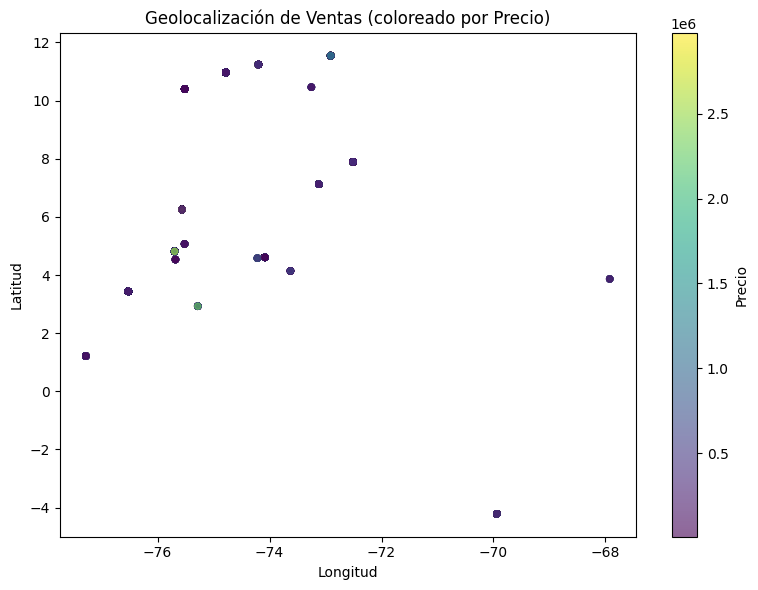

In [95]:
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
plt.figure(figsize=(8,6))
sc = plt.scatter(
    df_all['lon'],
    df_all['lat'],
    c=df_all['Precio'],
    s=20,
    alpha=0.6,
    cmap='viridis'
)
plt.colorbar(sc, label='Precio')
plt.title('Geolocalización de Ventas (coloreado por Precio)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

In [100]:
import folium

center = [df_all['lat'].mean(), df_all['lon'].mean()]
m = folium.Map(location=center, zoom_start=5)
for _, row in df_all.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(m)
#Guardado de archivo
m.save('ventas_mapa.html')

# Categoría menos vendida (Extra)

In [124]:
for df, nombre in zip(tiendas, nombres):
    counts = df['Categoría del Producto'].value_counts()
    low_categoria = counts.idxmin()
    low_ventas    = counts.min()
    print(f"{nombre}: {low_categoria} = {low_ventas} ventas")

Tienda 1: Artículos para el hogar = 171 ventas
Tienda 2: Artículos para el hogar = 181 ventas
Tienda 3: Instrumentos musicales = 177 ventas
Tienda 4: Instrumentos musicales = 170 ventas
